In [2]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import re
import torch
from sentence_transformers import SentenceTransformer, util

In [3]:
model_name = "Huffon/sentence-klue-roberta-base" 
model = SentenceTransformer(model_name)

df = pd.read_csv(r'C:\Users\USER\source\repos\NLP_Proj\NLP_Proj\embedding.csv',  encoding='utf-8-sig')
df.columns = ["index", "input"]
df = model.encode(df['input'].tolist())
#df = df["embedding"].apply(lambda x: re.sub(r'[^\d\.\-\se]', '', x)).apply(lambda x: list(map(float, x.split())))
#df = df.apply(lambda x: np.array(x))
#df = np.stack(df.values)

No sentence-transformers model found with name Huffon/sentence-klue-roberta-base. Creating a new one with MEAN pooling.


In [4]:
def kmeans_SSE(X):
    sse = []
    for k in range(2, 100):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse

def kmeans_Silhouette(X):
    silhouette = []
    for k in range(2, 100):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette.append(score)
    return silhouette

In [5]:
import umap

reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=4,
    random_state=43)
df = reducer.fit_transform(df)

C:\Users\USER\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [6]:
#from sklearn.decomposition import PCA


# PCA를 사용하여 2차원으로 차원 축소
#pca = PCA(n_components=2)
#pcav = pca.fit_transform(df)

In [7]:
sse = kmeans_SSE(df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

In [8]:
silh = kmeans_Silhouette(df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

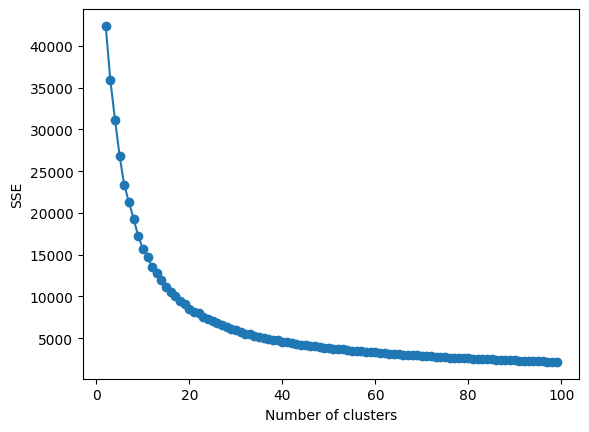

In [9]:
plt.plot(range(2, 100), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

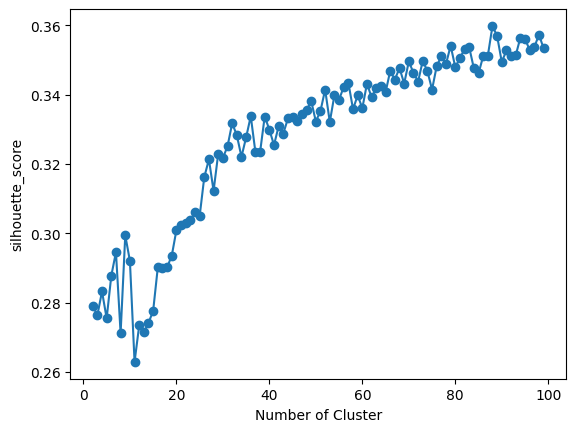

In [10]:
plt.plot(range(2, 100), silh, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('silhouette_score')
plt.show()

In [11]:
sorted_silh = [(i + 2, val) for i , val in enumerate(silh) if i < 20]
sorted_silh = sorted(sorted_silh, key=lambda x: x[1], reverse=True)
for s in sorted_silh:
    print(s)

(21, 0.30241978)
(20, 0.30087957)
(9, 0.2994249)
(7, 0.2945658)
(19, 0.29350996)
(10, 0.2920608)
(18, 0.2901921)
(16, 0.2901452)
(17, 0.29012528)
(6, 0.28777802)
(4, 0.2832353)
(2, 0.27912512)
(15, 0.27761638)
(3, 0.27634597)
(5, 0.2754684)
(14, 0.2741436)
(12, 0.27341923)
(13, 0.27145836)
(8, 0.2711415)
(11, 0.26289016)


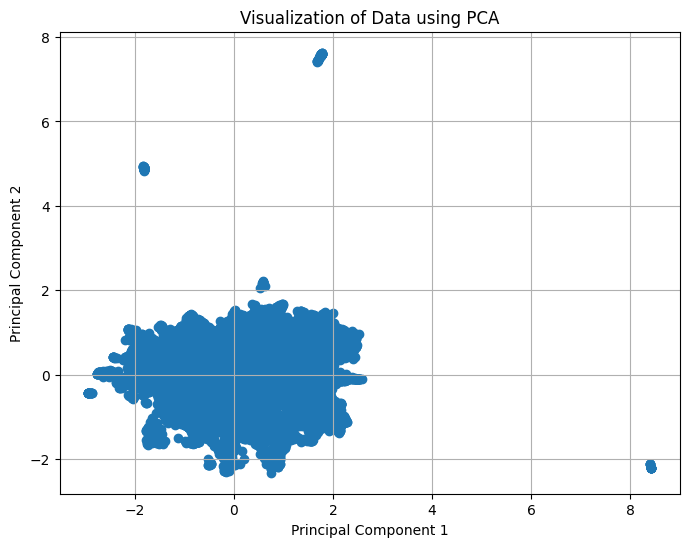

In [12]:
from sklearn.decomposition import PCA

data = df

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Visualization of Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 2.4796739  13.0087385  11.026706    4.43006   ]
 [ 0.22267205 15.009385    9.184979    4.5606923 ]
 [ 0.6473985  13.035287    9.392198    4.9244027 ]
 [ 0.73802507 13.544611   10.889214    4.180024  ]
 [-0.6304544   6.5520663   4.9414043   2.3616953 ]
 [ 1.01518    14.404601    9.098806    4.4679055 ]
 [ 1.891916   14.694782   10.096948    3.7084959 ]
 [13.516892    8.70159     9.552578    4.2889833 ]
 [ 0.5014338  12.643394   10.960312    5.7187076 ]
 [ 1.1504788  13.796608   10.084629    5.7753105 ]
 [ 0.9347207  13.341695    9.214242    2.7242317 ]
 [ 2.0626175  12.225486    9.704375    5.6424317 ]
 [ 0.12961411 12.393571    4.4392757   4.356835  ]]
Cluster Labels:
[11  9  5 ... 11  8  1]


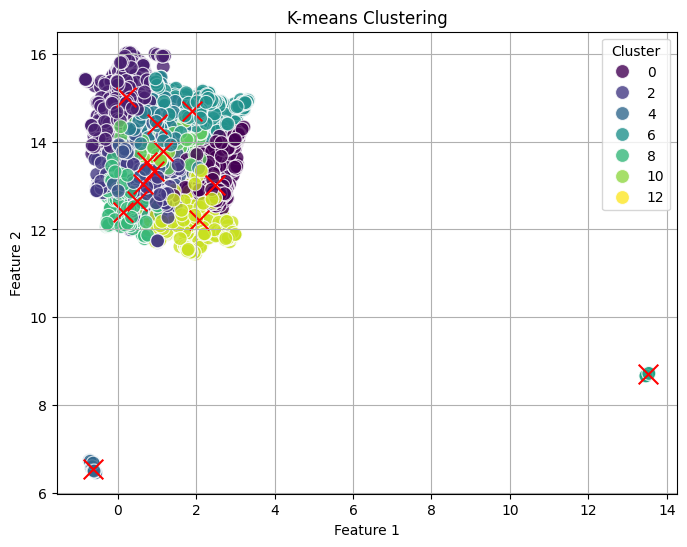

In [13]:
import seaborn as sns

kmeans = KMeans(n_clusters=13)  # 클러스터 개수 설정
kmeans.fit(data)

# 군집 중심 확인
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(centroids)

# 군집 할당 확인
labels = kmeans.labels_
print("Cluster Labels:")
print(labels)

# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트를 그립니다.
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)

# 중심점을 그립니다.
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [14]:
print(kmeans.labels_)
print(len(kmeans.labels_))
print(len(labels))

[11  9  5 ... 11  8  1]
14999
14999


In [15]:
df3 = pd.read_csv(r'C:\Users\USER\source\repos\NLP_Proj\NLP_Proj\embedding.csv',  encoding='utf-8-sig')
df3.columns = ["index", "input"]

ndf = pd.concat([pd.DataFrame(df3['input']),pd.DataFrame(kmeans.labels_)], axis = 1)
ndf.columns = ['sen' , 'lab']
print(ndf)

                                                     sen  lab
0      혹시 컴활에 대해 물어보고 싶은분 물어보세요!혹시 컴활에 대해 물어보고 싶은분 물어...   11
1                                공설입 지원금공설입 지원금언제들어오냐...    9
2      나 너무 배고파 치킨 추천좀!!!나 너무 배고파 치킨 추천좀!!!메뉴 이름도 알려줘!!!    5
3      50대 여성분한테 작별선물 뭐가 좋을까50대 여성분한테 작별선물 뭐가 좋을까같이 일...    1
4                     자취생의 간단 삼겹살 정식자취생의 간단 삼겹살 정식소소한 행복    5
...                                                  ...  ...
14994  광운대도 굿즈이런거로 소포보내줬으면 좋겠어ㅠ광운대도 굿즈이런거로 소포보내줬으면 좋겠...    6
14995  미시경제학 수요의 가격탄력성미시경제학 수요의 가격탄력성경제학원론 10판에 나오는 부...    2
14996  세계도시문명사 족보세계도시문명사 족보세계도시문명사 족보 삽니다 ㅠㅠㅠ있으신 분 쪽지...   11
14997  ㅈㅈㅎ 교수님 수시시험 2장 안나오냐?ㅈㅈㅎ 교수님 수시시험 2장 안나오냐?수시대비...    8
14998     방에 에어컨 없는데방에 에어컨 없는데화상수업동안 방 문 닫아놓는데\nㄹㅇ 숨질거같다    1

[14999 rows x 2 columns]


In [16]:
from konlpy.tag import Okt
import csv

def return_df(x):
    with open(r"C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\stopword.txt", 'r', encoding = 'utf-8-sig') as f:
         stopwords = [word for sublist in csv.reader(f) for word in sublist]
        
    df_val = {}
    okt = Okt()
    for sen in x:
        word = []
        nouns =  okt.nouns(sen)
        nouns = list(filter(lambda noun : noun not in stopwords and len(noun) > 1, nouns))
        for noun in nouns:
            if noun in word: continue
            if noun in df_val.keys():
                df_val[noun] = df_val[noun] + 1
            else:
                df_val[noun] = 1
            word.append(noun)
    return df_val

In [17]:
def return_tf(x):
    with open(r"C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\stopword.txt", 'r', encoding = 'utf-8-sig') as f:
         stopwords = [word for sublist in csv.reader(f) for word in sublist]
        
    tf_val = {}
    okt = Okt()
    for sen in x:
        nouns =  okt.nouns(sen)
        nouns = list(filter(lambda noun : noun not in stopwords and len(noun) > 1, nouns))
        for noun in nouns:
            if noun in tf_val.keys():
                tf_val[noun] += 1
            else:
                tf_val[noun] = 1
    return tf_val

In [18]:
def return_tfidf(x, y, length):
    tfidf_val = {}
    for key, val in x.items():
        tfidf_val[key] = val * np.log(length / (y[key] * 10 + 1))
    return tfidf_val

14999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[1.01541927e+00 1.44036579e+01 9.10041470e+00 4.46887362e+00
  5.00000000e+00]
 [2.22165182e-01 1.50102871e+01 9.18373168e+00 4.56071676e+00
  1.00000000e+00]
 [2.06085747e+00 1.22278445e+01 9.70313643e+00 5.63976492e+00
  1.10000000e+01]
 [2.47958001e+00 1.30089019e+01 1.10270935e+01 4.42938812e+00
  8.88178420e-15]
 [7.38238391e-01 1.35448896e+01 1.08896243e+01 4.17996900e+00
  3.00000000e+00]
 [1.15232609e+00 1.37965478e+01 1.00837948e+01 5.77625384e+00
  9.00000000e+00]
 [6.42654184e-01 1.30358836e+01 9.39404809e+00 4.92387866e+00
  2.00000000e+00]
 [9.34720708e-01 1.33416947e+01 9.21424244e+00 2.72423175e+00
  1.00000000e+01]
 [5.01433814e-01 1.26433948e+01 1.09603114e+01 5.71870758e+00
  8.00000000e+00]
 [1.89210505e+00 1.46948020e+01 1.00971329e+01 3.70772440e+00
  6.00000000e+00]]
Cluster Labels:
[2 5 0 ... 6 2 8]


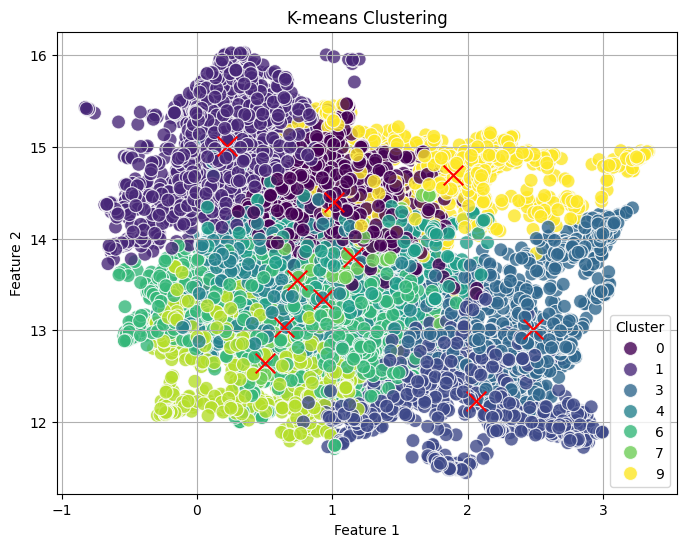

In [23]:
klabels = labels
data = pd.concat([pd.DataFrame(list(df)),pd.DataFrame(klabels)], axis = 1)
print(len(labels))
data.columns = ['0', '1', '2', '3', 'lab']
data = data[(data['lab'] != 4)  & (data['lab'] != 7)  & (data['lab'] != 12)]
data = np.asarray(data.iloc[:-1].values.tolist())

kmeans = KMeans(n_clusters=10)  # 클러스터 개수 설정
kmeans.fit(data)

# 군집 중심 확인
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(centroids)

klabels =  kmeans.labels_
print("Cluster Labels:")
print(klabels)

# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트를 그립니다.
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=klabels, palette='viridis', s=100, alpha=0.8)

# 중심점을 그립니다.
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [26]:
# 이상치 제거
filtered_ndf = ndf[(ndf['lab'] != 7)  & (ndf['lab'] != 4)  & (ndf['lab'] != 12)]
for i in range(0, 13):
    if i == 4 or i == 7 or i == 12: continue
    corpus = []
    for index, row in filtered_ndf.iterrows():
        if row['lab'] == i: corpus.append(row['sen'])
    tfidf = return_tfidf(return_tf(corpus), return_df(corpus), len(corpus))
    tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)
    print( str(i) + "th label")
    cnt = 0
    for item in tfidf:
        if cnt >= 20: break
        print(item)
        cnt += 1
    pd.DataFrame(corpus).to_csv(r'C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\df\13_labels_' + str(i) + ".csv", encoding='utf-8-sig', mode='a', index=False, header=False)
    print(" ")

0th label
('복전', 110.70377858958351)
('계절', 108.81461922357005)
('질문', 101.55581898379992)
('포기', 98.08211028199635)
('졸업', 97.78618799259431)
('재수강', 95.79759603065064)
('복학', 93.76110775864443)
('학번', 93.32371190454552)
('예비군', 89.96642397114437)
('미디어', 89.14166328003728)
('복수', 86.08070876517164)
('졸업식', 85.44171434585196)
('프로그램', 85.3528661232627)
('장학금', 81.02015021532425)
('교환학생', 80.73909843564238)
('세기', 80.13271384828141)
('전과', 80.04374101397816)
('강의', 80.02025575953274)
('대학원', 78.55300038473294)
('인강', 77.7892598788247)
 
1th label
('멍청이', 211.29121470552877)
('다나', 206.00893433789057)
('추천', 141.68881230167943)
('헬스장', 136.13862383988192)
('친구', 134.7602263669326)
('운동', 133.184828081007)
('요즘', 126.98558712322385)
('선물', 126.43169951570115)
('에타', 123.35328636712799)
('여자', 123.3398682002434)
('남자', 121.10865599505517)
('신천지', 120.19566496380975)
('노래', 116.34878070597145)
('오늘', 114.61963304712987)
('번방', 112.54219823892666)
('생각', 108.07989582910754)
('동아리', 106.6175

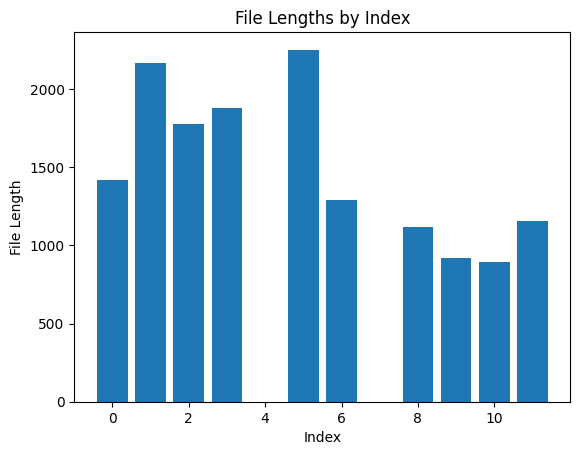

In [34]:
file_lengths = []

for i in range(0, 13):
    if i in [4, 7, 12]:
        continue
    file_path = r'C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\df\13_labels_' + str(i) + ".csv"
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    file_lengths.append(len(df))

indexes = [i for i in range(13) if i not in [4, 7, 12]]
plt.bar(indexes, file_lengths)
plt.xlabel('Index')
plt.ylabel('File Length')
plt.title('File Lengths by Index')
plt.show()
